In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, r'C:\code\astrocam')
import pandas as pd
from pathlib import Path
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
pi_data_file = r"D:\Astro\Objects\C30-NGC7331\fwhm.csv"
df = pd.read_csv(pi_data_file)

In [3]:
fit_list = {x.name:str(x) for x in Path(r"D:\Astro").glob("**/*.fit")}
print(f"Found {len(fit_list)}")

Found 2789


In [4]:
df['fit_file'] = df.File.apply(lambda x: fit_list[re.findall(r'(Light_.*?C).*',x)[0]+".fit"])

In [5]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF Power Weight,SNR Weight,FWHM,Eccentricity,...,Median,Median Mean Deviation,Noise,Noise Ratio,Stars,Star Residual,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file
0,14,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00948_...,0.0,776.0,2810000.0,1.80,3.0627,0.4692,...,16.1,2.88,0.429,0.715,458,0.0193,1.1625,0.1532,0.0104,D:\Astro\20220922\C30\Light\Light_00948_180.0s...
1,27,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00961_...,0.0,726.0,2490000.0,1.78,3.1120,0.4887,...,16.6,2.96,0.435,0.720,428,0.0198,1.0250,0.1450,0.0109,D:\Astro\20220922\C30\Light\Light_00961_180.0s...
2,21,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00955_...,0.0,741.0,2610000.0,1.80,3.1677,0.4720,...,16.3,2.91,0.431,0.718,453,0.0208,1.0185,0.1411,0.0103,D:\Astro\20220922\C30\Light\Light_00955_180.0s...
3,18,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00952_...,0.0,759.0,2700000.0,1.81,3.1840,0.4619,...,16.2,2.90,0.430,0.717,447,0.0211,1.0659,0.1480,0.0103,D:\Astro\20220922\C30\Light\Light_00952_180.0s...
4,19,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00953_...,0.0,722.0,2460000.0,1.85,3.1876,0.5180,...,16.3,2.90,0.431,0.718,383,0.0226,1.0306,0.1198,0.0103,D:\Astro\20220922\C30\Light\Light_00953_180.0s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,54,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01310_...,0.0,680.0,2240000.0,1.88,3.9763,0.4168,...,17.1,3.08,0.437,0.726,361,0.0228,1.0214,0.1422,0.0112,D:\Astro\20220927\C30\Light\Light_01310_180.0s...
70,57,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01317_...,0.0,657.0,2070000.0,1.88,3.9848,0.4075,...,17.5,3.16,0.443,0.731,351,0.0258,0.9513,0.1372,0.0122,D:\Astro\20220927\C30\Light\Light_01317_180.0s...
71,52,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01308_...,0.0,689.0,2300000.0,1.89,3.9939,0.4116,...,17.0,3.06,0.435,0.727,366,0.0225,1.0908,0.1505,0.0109,D:\Astro\20220927\C30\Light\Light_01308_180.0s...
72,56,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01312_...,0.0,681.0,2230000.0,1.88,4.0048,0.4207,...,17.2,3.11,0.439,0.728,361,0.0249,0.9815,0.1423,0.0112,D:\Astro\20220927\C30\Light\Light_01312_180.0s...


In [6]:
print(f"Numer of images: {len(df)}")

Numer of images: 74


In [7]:
starfinder = StarFinder()
starmatcher = StarMatcher()
starData = starfinder.getStarData(df.fit_file[0], topk=40)
star_img = starData["star_mask"]
df_ref = starData["stars"]

img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  75%|███████▍  | 306/410 [00:00<00:00, 319.57it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Calculating FWHM: 100%|██████████| 410/410 [00:01<00:00, 287.39it/s]


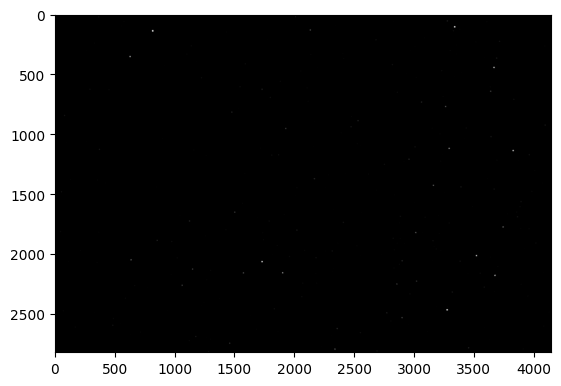

In [8]:
plt.imshow(star_img, cmap='gray')

In [9]:
df_ref

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,330,632.930303,2051.966667,22.000977,18.000977,19.445930,22.883351,"[611, 2032, 654, 2071]",531626,8340,8.337355,9.019000
1,323,3669.024768,2181.693498,18.000977,18.000977,19.680262,18.854735,"[3649, 2162, 3690, 2201]",565537,8955,10.661034,10.624041
2,313,3514.498403,2016.651757,17.000977,18.000977,19.475557,18.278973,"[3495, 1997, 3534, 2036]",523023,8300,11.263100,10.704717
3,311,3660.774920,445.263666,19.000977,18.000977,18.534161,19.843707,"[3640, 427, 3681, 464]",115911,1934,11.503017,10.919182
4,308,1898.061688,2160.506494,18.000977,19.000977,19.645572,17.729837,"[1880, 2140, 1917, 2181]",559915,8899,9.717917,10.065953
5,305,814.413115,139.524590,17.000977,20.000977,20.760033,17.477041,"[797, 119, 832, 160]",36464,545,13.797493,15.959861
6,304,3332.641447,106.085526,19.000977,18.000977,18.314829,20.185398,"[3312, 88, 3353, 125]",28805,494,13.387562,11.769476
7,304,3820.562500,1139.243421,18.000977,18.000977,19.445197,18.350336,"[3801, 1120, 3840, 1159]",296215,4799,11.044797,11.195841
8,302,625.692053,354.033113,18.000977,20.000977,20.443636,18.572477,"[607, 334, 644, 375]",92360,1450,9.402102,10.900787
9,299,1726.210702,2067.173913,18.000977,18.000977,18.568716,18.106730,"[1708, 2048, 1745, 2087]",536044,8504,11.669707,12.298536


In [10]:
def ave_fwhm(fname):
  starData = starfinder.getStarData(fname, topk=20)
  df = starData["stars"]
  return pd.Series({"myfwhm_x": df.fwhm_x.mean(), "myfwhm_y":df.fwhm_y.mean(), "myfwhm_ave":((df.fwhm_x + df.fwhm_y)/2).mean()})

In [11]:
cols = df.fit_file.apply(lambda x: ave_fwhm(x))
cols

img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  73%|███████▎  | 301/410 [00:00<00:00, 311.83it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Calculating FWHM: 100%|██████████| 410/410 [00:01<00:00, 284.98it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 399/399 [00:01<00:00, 311.65it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 407/407 [00:01<00:00, 314.56it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 412/412 [00:01<00:00, 307.82it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 386/386 [00:01<00:00, 315.67it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 425/425 [00:01<00:00, 307.58it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 414/414 [00:01<00:00, 313.38it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 427/427 [00:01<00:00, 308.43it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 416/416 [00:01<00:00, 311.11it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 422/422 [00:01<00:00, 303.21it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 407/407 [00:01<00:00, 305.84it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 419/419 [00:01<00:00, 296.81it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 417/417 [00:01<00:00, 309.52it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 426/426 [00:01<00:00, 319.79it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 429/429 [00:01<00:00, 334.73it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 420/420 [00:01<00:00, 327.09it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 430/430 [00:01<00:00, 324.69it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 435/435 [00:01<00:00, 312.54it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 442/442 [00:01<00:00, 335.36it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 425/425 [00:01<00:00, 332.72it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 431/431 [00:01<00:00, 327.96it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 449/449 [00:01<00:00, 334.74it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 391/391 [00:01<00:00, 294.21it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 441/441 [00:01<00:00, 322.31it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 417/417 [00:01<00:00, 315.15it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 444/444 [00:01<00:00, 319.69it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 405/405 [00:01<00:00, 325.18it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 434/434 [00:01<00:00, 323.01it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 411/411 [00:01<00:00, 320.28it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 448/448 [00:01<00:00, 324.21it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 453/453 [00:01<00:00, 325.12it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 430/430 [00:01<00:00, 312.24it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 419/419 [00:01<00:00, 333.78it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 377/377 [00:01<00:00, 333.58it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 425/425 [00:01<00:00, 333.00it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 443/443 [00:01<00:00, 308.24it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 401/401 [00:01<00:00, 316.09it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 426/426 [00:01<00:00, 323.42it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 432/432 [00:01<00:00, 337.62it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 428/428 [00:01<00:00, 315.05it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 416/416 [00:01<00:00, 317.56it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 439/439 [00:01<00:00, 336.05it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 423/423 [00:01<00:00, 319.07it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 409/409 [00:01<00:00, 311.66it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 418/418 [00:01<00:00, 334.36it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 390/390 [00:01<00:00, 316.38it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 406/406 [00:01<00:00, 310.19it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 406/406 [00:01<00:00, 320.02it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 413/413 [00:01<00:00, 332.51it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 425/425 [00:01<00:00, 337.11it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 441/441 [00:01<00:00, 337.27it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 408/408 [00:01<00:00, 324.03it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 436/436 [00:01<00:00, 337.87it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 421/421 [00:01<00:00, 299.91it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 421/421 [00:01<00:00, 314.45it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 434/434 [00:01<00:00, 313.99it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 415/415 [00:01<00:00, 318.39it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 431/431 [00:01<00:00, 325.42it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 475/475 [00:01<00:00, 330.47it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 411/411 [00:01<00:00, 322.30it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 417/417 [00:01<00:00, 305.90it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 448/448 [00:01<00:00, 341.18it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 431/431 [00:01<00:00, 329.23it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 407/407 [00:01<00:00, 318.12it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 433/433 [00:01<00:00, 342.66it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 403/403 [00:01<00:00, 318.58it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 426/426 [00:01<00:00, 323.36it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 411/411 [00:01<00:00, 316.92it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 437/437 [00:01<00:00, 329.59it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 449/449 [00:01<00:00, 328.25it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 420/420 [00:01<00:00, 325.57it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 427/427 [00:01<00:00, 310.85it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 438/438 [00:01<00:00, 324.15it/s]


img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|██████████| 407/407 [00:01<00:00, 321.57it/s]


,myfwhm_x,myfwhm_y,myfwhm_ave
0,10.429409,10.398997,10.414203
1,11.286856,11.289979,11.288418
2,10.451462,10.377361,10.414412
3,13.281536,12.747972,13.014754
4,12.391010,10.100472,11.245741
...,...,...,...
69,12.280621,12.079622,12.180121
70,12.520822,12.528309,12.524566
71,11.514945,11.574933,11.544939
72,12.929937,13.144883,13.037410


In [12]:
df[['my_fwhm_x', 'my_fwhm_y', 'my_fwhm']] = cols

In [13]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF Power Weight,SNR Weight,FWHM,Eccentricity,...,Noise Ratio,Stars,Star Residual,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file,my_fwhm_x,my_fwhm_y,my_fwhm
0,14,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00948_...,0.0,776.0,2810000.0,1.80,3.0627,0.4692,...,0.715,458,0.0193,1.1625,0.1532,0.0104,D:\Astro\20220922\C30\Light\Light_00948_180.0s...,10.429409,10.398997,10.414203
1,27,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00961_...,0.0,726.0,2490000.0,1.78,3.1120,0.4887,...,0.720,428,0.0198,1.0250,0.1450,0.0109,D:\Astro\20220922\C30\Light\Light_00961_180.0s...,11.286856,11.289979,11.288418
2,21,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00955_...,0.0,741.0,2610000.0,1.80,3.1677,0.4720,...,0.718,453,0.0208,1.0185,0.1411,0.0103,D:\Astro\20220922\C30\Light\Light_00955_180.0s...,10.451462,10.377361,10.414412
3,18,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00952_...,0.0,759.0,2700000.0,1.81,3.1840,0.4619,...,0.717,447,0.0211,1.0659,0.1480,0.0103,D:\Astro\20220922\C30\Light\Light_00952_180.0s...,13.281536,12.747972,13.014754
4,19,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00953_...,0.0,722.0,2460000.0,1.85,3.1876,0.5180,...,0.718,383,0.0226,1.0306,0.1198,0.0103,D:\Astro\20220922\C30\Light\Light_00953_180.0s...,12.391010,10.100472,11.245741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,54,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01310_...,0.0,680.0,2240000.0,1.88,3.9763,0.4168,...,0.726,361,0.0228,1.0214,0.1422,0.0112,D:\Astro\20220927\C30\Light\Light_01310_180.0s...,12.280621,12.079622,12.180121
70,57,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01317_...,0.0,657.0,2070000.0,1.88,3.9848,0.4075,...,0.731,351,0.0258,0.9513,0.1372,0.0122,D:\Astro\20220927\C30\Light\Light_01317_180.0s...,12.520822,12.528309,12.524566
71,52,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01308_...,0.0,689.0,2300000.0,1.89,3.9939,0.4116,...,0.727,366,0.0225,1.0908,0.1505,0.0109,D:\Astro\20220927\C30\Light\Light_01308_180.0s...,11.514945,11.574933,11.544939
72,56,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01312_...,0.0,681.0,2230000.0,1.88,4.0048,0.4207,...,0.728,361,0.0249,0.9815,0.1423,0.0112,D:\Astro\20220927\C30\Light\Light_01312_180.0s...,12.929937,13.144883,13.037410


[ 0.02198651 11.25474828]
[0.01150596 3.2193    ]


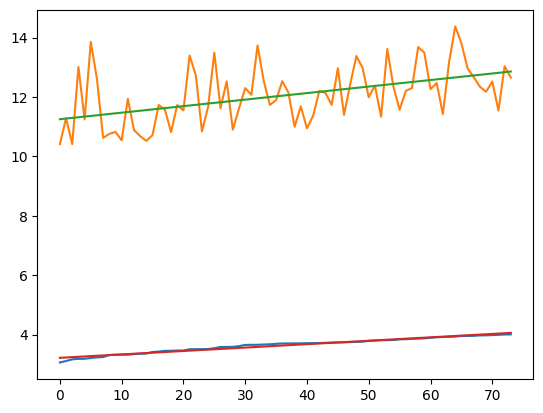

In [14]:
import numpy as np
plt.plot(df.FWHM)
plt.plot(df.my_fwhm)
# plt.plot(df.my_fwhm_y-6.5)
# plt.plot(df.my_fwhm-6.5)

z = np.polyfit(df.index, df.my_fwhm, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

z = np.polyfit(df.index, df.FWHM, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

plt.show()

In [15]:
df_ref

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,330,632.930303,2051.966667,22.000977,18.000977,19.445930,22.883351,"[611, 2032, 654, 2071]",531626,8340,8.337355,9.019000
1,323,3669.024768,2181.693498,18.000977,18.000977,19.680262,18.854735,"[3649, 2162, 3690, 2201]",565537,8955,10.661034,10.624041
2,313,3514.498403,2016.651757,17.000977,18.000977,19.475557,18.278973,"[3495, 1997, 3534, 2036]",523023,8300,11.263100,10.704717
3,311,3660.774920,445.263666,19.000977,18.000977,18.534161,19.843707,"[3640, 427, 3681, 464]",115911,1934,11.503017,10.919182
4,308,1898.061688,2160.506494,18.000977,19.000977,19.645572,17.729837,"[1880, 2140, 1917, 2181]",559915,8899,9.717917,10.065953
5,305,814.413115,139.524590,17.000977,20.000977,20.760033,17.477041,"[797, 119, 832, 160]",36464,545,13.797493,15.959861
6,304,3332.641447,106.085526,19.000977,18.000977,18.314829,20.185398,"[3312, 88, 3353, 125]",28805,494,13.387562,11.769476
7,304,3820.562500,1139.243421,18.000977,18.000977,19.445197,18.350336,"[3801, 1120, 3840, 1159]",296215,4799,11.044797,11.195841
8,302,625.692053,354.033113,18.000977,20.000977,20.443636,18.572477,"[607, 334, 644, 375]",92360,1450,9.402102,10.900787
9,299,1726.210702,2067.173913,18.000977,18.000977,18.568716,18.106730,"[1708, 2048, 1745, 2087]",536044,8504,11.669707,12.298536


In [16]:
df_fwhm = None

for i, tgt_file in enumerate(df.fit_file):
    print(f"Processing {tgt_file}...")
    df_tgt = starfinder.getStarData(tgt_file, topk=10)['stars']

    df_matched = starmatcher.matchStars(df_ref, df_tgt)
     
    if df_fwhm is None:
        df_fwhm = df_matched[['index_ref', 'fwhm_x_ref', 'fwhm_y_ref', 'fwhm_x_tgt', 'fwhm_y_tgt']]
    else:
        df_fwhm = pd.merge(left=df_fwhm, right=df_matched[['index_ref', 'fwhm_x_tgt', 'fwhm_y_tgt']], how='left', on='index_ref', suffixes=('', f'_{i:05d}'))
    
    

df_fwhm.to_csv("fwhm.csv")

Processing D:\Astro\20220922\C30\Light\Light_00948_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  77%|███████▋  | 317/410 [00:01<00:00, 317.04it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 76/76 [00:00<00:00, 650.72it/s]


Processing D:\Astro\20220922\C30\Light\Light_00961_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 702.88it/s]


Processing D:\Astro\20220922\C30\Light\Light_00955_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  98%|█████████▊| 399/407 [00:01<00:00, 315.83it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 696.17it/s]


Processing D:\Astro\20220922\C30\Light\Light_00952_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  92%|█████████▏| 380/412 [00:01<00:00, 322.65it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 80/80 [00:00<00:00, 665.48it/s]


Processing D:\Astro\20220922\C30\Light\Light_00953_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  96%|█████████▌| 369/386 [00:01<00:00, 320.75it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 81/81 [00:00<00:00, 640.59it/s]


Processing D:\Astro\20220922\C30\Light\Light_00956_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/425 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 85/85 [00:00<00:00, 763.07it/s]


Processing D:\Astro\20220922\C30\Light\Light_00962_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 73/73 [00:00<00:00, 718.34it/s]


Processing D:\Astro\20220922\C30\Light\Light_00950_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/427 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 88/88 [00:00<00:00, 697.28it/s]


Processing D:\Astro\20220922\C30\Light\Light_00940_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  93%|█████████▎| 388/416 [00:01<00:00, 324.32it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 84/84 [00:00<00:00, 801.67it/s]


Processing D:\Astro\20220922\C30\Light\Light_00935_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  93%|█████████▎| 393/422 [00:01<00:00, 326.66it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 633.72it/s]


Processing D:\Astro\20220922\C30\Light\Light_00964_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  94%|█████████▎| 381/407 [00:01<00:00, 290.94it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 80/80 [00:00<00:00, 667.26it/s]


Processing D:\Astro\20220922\C30\Light\Light_00949_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/419 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 94/94 [00:00<00:00, 648.99it/s]


Processing D:\Astro\20220922\C30\Light\Light_00934_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  94%|█████████▍| 392/417 [00:01<00:00, 314.07it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 83/83 [00:00<00:00, 688.60it/s]


Processing D:\Astro\20220922\C30\Light\Light_00945_180.0sec_200gain_0.0C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  94%|█████████▍| 400/426 [00:01<00:00, 318.37it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 731.04it/s]


Processing D:\Astro\20220922\C30\Light\Light_00939_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 685.02it/s]


Processing D:\Astro\20220922\C30\Light\Light_00967_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 661.34it/s]


Processing D:\Astro\20220922\C30\Light\Light_00959_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 726.87it/s]


Processing D:\Astro\20220922\C30\Light\Light_00954_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/435 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 634.46it/s]


Processing D:\Astro\20220922\C30\Light\Light_00941_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 599.93it/s]


Processing D:\Astro\20220922\C30\Light\Light_00965_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  95%|█████████▌| 405/425 [00:01<00:00, 325.40it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 74/74 [00:00<00:00, 678.13it/s]


Processing D:\Astro\20220922\C30\Light\Light_00957_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM: 100%|█████████▉| 429/431 [00:01<00:00, 326.17it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 75/75 [00:00<00:00, 703.58it/s]


Processing D:\Astro\20220922\C30\Light\Light_00946_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  96%|█████████▌| 430/449 [00:01<00:00, 326.85it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 81/81 [00:00<00:00, 633.84it/s]


Processing D:\Astro\20220927\C30\Light\Light_01326_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  96%|█████████▌| 376/391 [00:01<00:00, 326.07it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 702.84it/s]


Processing D:\Astro\20220922\C30\Light\Light_00942_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/441 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 85/85 [00:00<00:00, 650.58it/s]


Processing D:\Astro\20220927\C30\Light\Light_01325_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/417 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 633.65it/s]


Processing D:\Astro\20220922\C30\Light\Light_00944_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  98%|█████████▊| 437/444 [00:01<00:00, 319.66it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 87/87 [00:00<00:00, 620.23it/s]


Processing D:\Astro\20220922\C30\Light\Light_00960_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  98%|█████████▊| 397/405 [00:01<00:00, 320.41it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 74/74 [00:00<00:00, 751.16it/s]


Processing D:\Astro\20220922\C30\Light\Light_00970_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/434 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 79/79 [00:00<00:00, 747.30it/s]


Processing D:\Astro\20220922\C30\Light\Light_00958_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  98%|█████████▊| 404/411 [00:01<00:00, 314.65it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 71/71 [00:00<00:00, 651.88it/s]


Processing D:\Astro\20220922\C30\Light\Light_00936_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  99%|█████████▊| 442/448 [00:01<00:00, 314.98it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 94/94 [00:00<00:00, 658.30it/s]


Processing D:\Astro\20220922\C30\Light\Light_00943_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/453 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 84/84 [00:00<00:00, 664.14it/s]


Processing D:\Astro\20220922\C30\Light\Light_00972_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  94%|█████████▍| 406/430 [00:01<00:00, 322.08it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 77/77 [00:00<00:00, 624.83it/s]


Processing D:\Astro\20220922\C30\Light\Light_00982_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 773.82it/s]


Processing D:\Astro\20220922\C30\Light\Light_00992_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 87/87 [00:00<00:00, 657.20it/s]


Processing D:\Astro\20220922\C30\Light\Light_00979_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 76/76 [00:00<00:00, 830.53it/s]


Processing D:\Astro\20220922\C30\Light\Light_00951_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/443 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 70/70 [00:00<00:00, 648.24it/s]


Processing D:\Astro\20220927\C30\Light\Light_01327_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/401 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 98/98 [00:00<00:00, 696.40it/s]


Processing D:\Astro\20220922\C30\Light\Light_00974_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/426 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 81/81 [00:00<00:00, 702.39it/s]


Processing D:\Astro\20220922\C30\Light\Light_00978_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 600.47it/s]


Processing D:\Astro\20220922\C30\Light\Light_00981_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/428 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 74/74 [00:00<00:00, 651.59it/s]


Processing D:\Astro\20220922\C30\Light\Light_00977_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 76/76 [00:00<00:00, 683.55it/s]


Processing D:\Astro\20220922\C30\Light\Light_00966_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 84/84 [00:00<00:00, 692.77it/s]


Processing D:\Astro\20220927\C30\Light\Light_01324_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/423 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 747.45it/s]


Processing D:\Astro\20220927\C30\Light\Light_01323_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  88%|████████▊ | 358/409 [00:01<00:00, 344.43it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 96/96 [00:00<00:00, 693.99it/s]


Processing D:\Astro\20220922\C30\Light\Light_00976_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 76/76 [00:00<00:00, 686.80it/s]


Processing D:\Astro\20220922\C30\Light\Light_00985_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/390 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 83/83 [00:00<00:00, 793.51it/s]


Processing D:\Astro\20220927\C30\Light\Light_01328_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/406 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 73/73 [00:00<00:00, 625.30it/s]


Processing D:\Astro\20220927\C30\Light\Light_01329_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  88%|████████▊ | 359/406 [00:01<00:00, 338.82it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 93/93 [00:00<00:00, 702.84it/s]


Processing D:\Astro\20220922\C30\Light\Light_00975_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Matching triangles: 100%|██████████| 89/89 [00:00<00:00, 641.13it/s]


Processing D:\Astro\20220922\C30\Light\Light_00963_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  92%|█████████▏| 391/425 [00:01<00:00, 348.57it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 79/79 [00:00<00:00, 665.49it/s]


Processing D:\Astro\20220922\C30\Light\Light_00969_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/441 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 687.43it/s]


Processing D:\Astro\20220922\C30\Light\Light_00983_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  94%|█████████▍| 384/408 [00:01<00:00, 342.55it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 650.61it/s]


Processing D:\Astro\20220922\C30\Light\Light_00968_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  96%|█████████▋| 420/436 [00:01<00:00, 338.83it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 72/72 [00:00<00:00, 669.48it/s]


Processing D:\Astro\20220927\C30\Light\Light_01330_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/421 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 85/85 [00:00<00:00, 701.08it/s]


Processing D:\Astro\20220927\C30\Light\Light_01322_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  89%|████████▊ | 373/421 [00:01<00:00, 348.31it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 87/87 [00:00<00:00, 754.27it/s]


Processing D:\Astro\20220922\C30\Light\Light_00971_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/434 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 82/82 [00:00<00:00, 644.63it/s]


Processing D:\Astro\20220927\C30\Light\Light_01320_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/415 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 93/93 [00:00<00:00, 689.89it/s]


Processing D:\Astro\20220927\C30\Light\Light_01321_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  96%|█████████▌| 414/431 [00:01<00:00, 321.52it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 694.11it/s]


Processing D:\Astro\20220922\C30\Light\Light_00937_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/475 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 71/71 [00:00<00:00, 713.32it/s]


Processing D:\Astro\20220927\C30\Light\Light_01340_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  88%|████████▊ | 363/411 [00:01<00:00, 347.55it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 91/91 [00:00<00:00, 685.47it/s]


Processing D:\Astro\20220927\C30\Light\Light_01319_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/417 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 627.89it/s]


Processing D:\Astro\20220922\C30\Light\Light_00973_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/448 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 86/86 [00:00<00:00, 686.58it/s]


Processing D:\Astro\20220927\C30\Light\Light_01311_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/431 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 85/85 [00:00<00:00, 678.41it/s]


Processing D:\Astro\20220927\C30\Light\Light_01336_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/407 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 88/88 [00:00<00:00, 756.05it/s]


Processing D:\Astro\20220922\C30\Light\Light_00947_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  95%|█████████▌| 413/433 [00:01<00:00, 333.81it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 74/74 [00:00<00:00, 704.77it/s]


Processing D:\Astro\20220927\C30\Light\Light_01345_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/403 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 701.48it/s]


Processing D:\Astro\20220927\C30\Light\Light_01303_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/426 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 707.24it/s]


Processing D:\Astro\20220927\C30\Light\Light_01341_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/411 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 82/82 [00:00<00:00, 624.77it/s]


Processing D:\Astro\20220927\C30\Light\Light_01309_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/437 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 88/88 [00:00<00:00, 665.81it/s]


Processing D:\Astro\20220927\C30\Light\Light_01310_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/449 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 96/96 [00:00<00:00, 691.39it/s]


Processing D:\Astro\20220927\C30\Light\Light_01317_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  90%|█████████ | 380/420 [00:01<00:00, 347.90it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 82/82 [00:00<00:00, 774.75it/s]


Processing D:\Astro\20220927\C30\Light\Light_01308_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/427 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 83/83 [00:00<00:00, 706.83it/s]


Processing D:\Astro\20220927\C30\Light\Light_01312_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:   0%|          | 0/438 [00:00<?, ?it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 74/74 [00:00<00:00, 691.69it/s]


Processing D:\Astro\20220927\C30\Light\Light_01346_180.0sec_200gain_-0.3C.fit...
img16 shape: (2822, 4144), img8 shape: (2822, 4144)


Calculating FWHM:  90%|████████▉ | 365/407 [00:01<00:00, 335.93it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 727.87it/s]


In [17]:
df_fwhm.T.to_csv("fwhm_t.csv")